In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the data set
df = pd.read_csv('advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


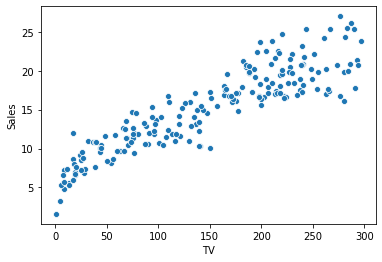

In [11]:
sns.scatterplot(df['TV'], df['Sales'])

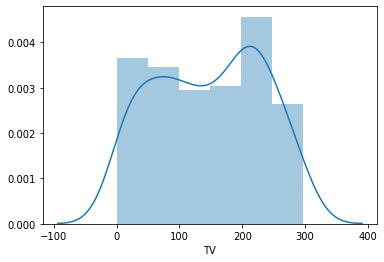

In [14]:
sns.distplot(df['TV'])

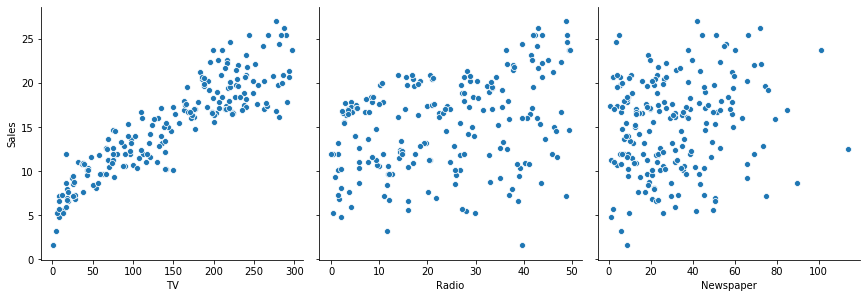

In [18]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], kind='scatter', size=4, aspect=1)

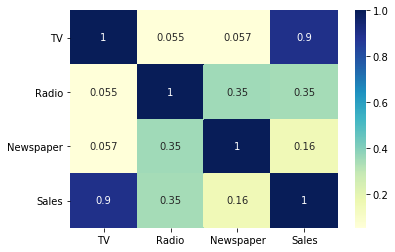

In [24]:
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu')

In [25]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [26]:
X = df['TV']
y = df['Sales']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,test_size=0.2)

In [28]:
X_train.shape, y_train.shape

((160,), (160,))

In [30]:
import statsmodels.api as sm

In [33]:
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant)
model = model.fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     691.5
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.37e-59
Time:                        23:27:25   Log-Likelihood:                -359.46
No. Observations:                 160   AIC:                             722.9
Df Residuals:                     158   BIC:                             729.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8024      0.368     18.496      0.000       6.076       7.529
TV             0.0562      0.002     26.295      0.000       0.052       0.060
==============================================================================
Omnibus:                        0.361   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.398
Skew:                          -0.112   Prob(JB):                        0.820
Kurtosis:                       2.902   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model.params

const    6.802410
TV       0.056235
dtype: float64

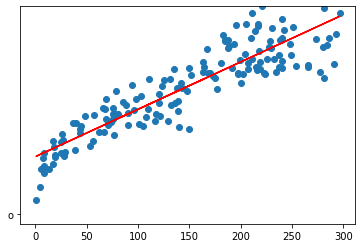

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.80214 + 0.056235 * X_train, 'r', 'o')
plt.show()

In [44]:
# PRedcitions

y_pred = model.predict(X_train_constant)

In [45]:
residual = y_train - y_pred

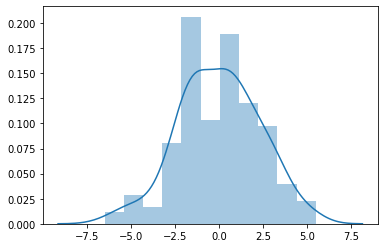

In [46]:
sns.distplot(residual)

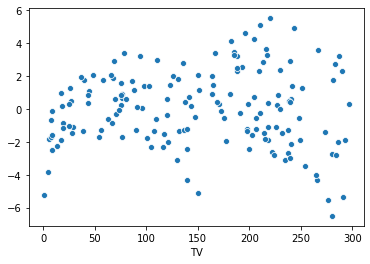

In [48]:
sns.scatterplot(X_train, residual)

In [49]:
y_test_pred = model.predict(sm.add_constant(X_test))


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_test_pred)
MAE

1.770678380671916

In [53]:
MSE = mean_squared_error(y_test,y_test_pred)
MSE

5.188919224827

In [55]:
RMSE = np.sqrt(MSE)
RMSE

2.277919933805181